# **Laboratorio 2 - Visión por Computadora**

- Paula Barillas - 22764
- Gerardo Pineda - 22880
- Mónica Salvatierra - 22249

Link del repositorio: https://github.com/paulabaal12/LAB2-VCP

## **Task 1**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
import os

  Dimensiones: (512, 512)
  Tipo de dato: uint8


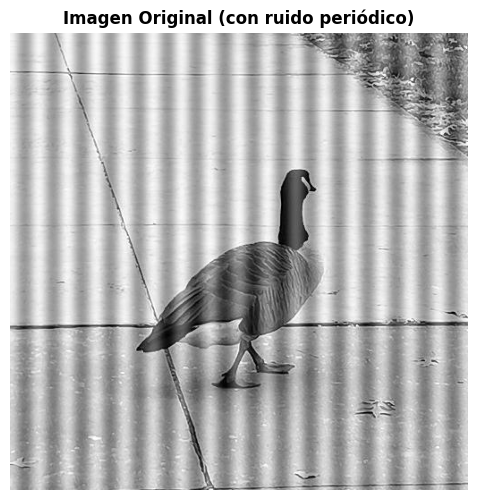

In [2]:
image = cv2.imread('img/periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)
print(f"  Dimensiones: {image.shape}")
print(f"  Tipo de dato: {image.dtype}")

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original (con ruido periódico)', fontsize=12, fontweight='bold')
plt.axis('off')
plt.tight_layout()

## **Task 2**

## **Task 3**

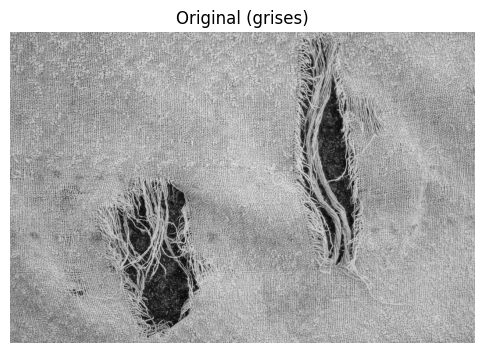

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title="", cmap="gray"):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

img = cv2.imread("img/image.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No pude leer la imagen. Revisa PATH.")

img_f = img.astype(np.float32) / 255.0
show(img, "Original (grises)")


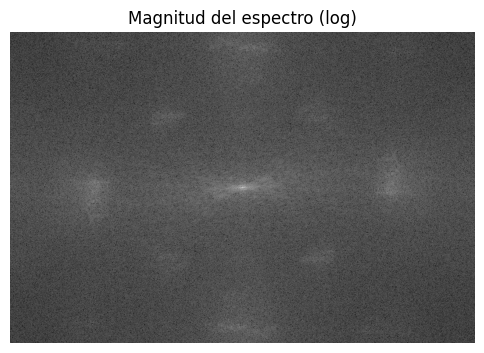

In [ ]:
#FFT
F = np.fft.fft2(img_f)
Fshift = np.fft.fftshift(F)
mag = np.log1p(np.abs(Fshift))

show(mag, "Magnitud del espectro (log)")


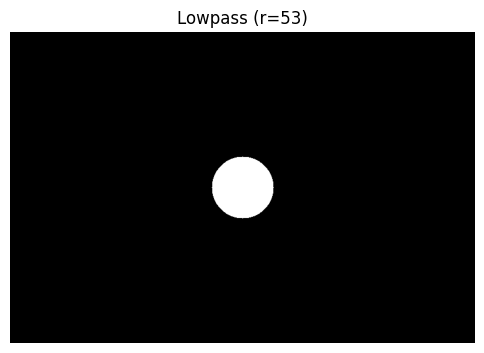

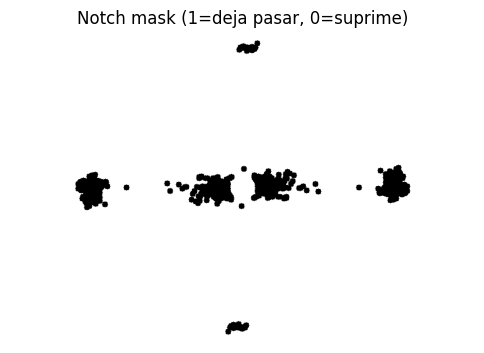

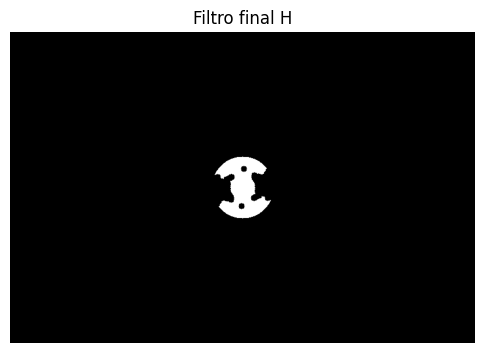

In [ ]:
# FFT
h, w = img.shape
cy, cx = h // 2, w // 2
Y, X = np.ogrid[:h, :w]
dist2 = (Y - cy) ** 2 + (X - cx) ** 2

r = int(0.10 * min(h, w)) 
lowpass = (dist2 <= r * r).astype(np.float32)

use_notch = True
notch = np.ones((h, w), np.float32)

if use_notch:
    center_exclusion = int(0.05 * min(h, w))
    safe = mag.copy()
    safe[dist2 < center_exclusion**2] = 0

    thr = np.percentile(safe, 99.7)       
    peaks = np.argwhere(safe > thr)
    notch_radius = max(3, int(0.01 * min(h, w)))

    for (py, px) in peaks:
        cv2.circle(notch, (int(px), int(py)), notch_radius, 0, -1)
        sy = int(2 * cy - py)
        sx = int(2 * cx - px)
        if 0 <= sy < h and 0 <= sx < w:
            cv2.circle(notch, (sx, sy), notch_radius, 0, -1)

H = lowpass * notch

show(lowpass, f"Lowpass (r={r})")
show(notch, "Notch mask (1=deja pasar, 0=suprime)")
show(H, "Filtro final H")


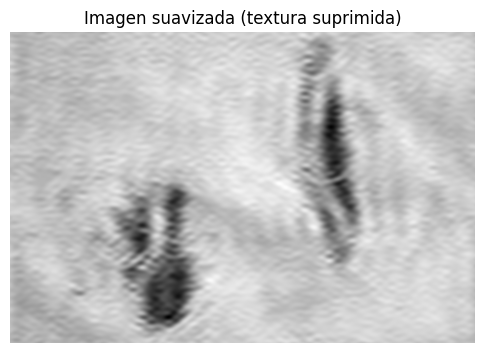

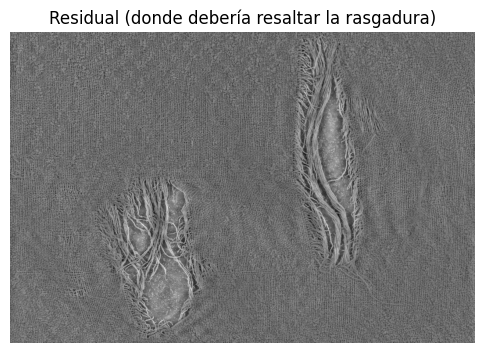

In [ ]:
#Threshold 
F_filt = Fshift * H
img_smooth = np.fft.ifft2(np.fft.ifftshift(F_filt))
img_smooth = np.real(img_smooth)

img_smooth = (img_smooth - img_smooth.min()) / (img_smooth.max() - img_smooth.min() + 1e-9)

residual = img_f - img_smooth
residual = (residual - residual.min()) / (residual.max() - residual.min() + 1e-9)

show(img_smooth, "Imagen suavizada (textura suprimida)")
show(residual, "Residual (donde debería resaltar la rasgadura)")


## **Prompt Utilizado**



### Por qué funcionó este prompt
